In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Personal_Finance_Dataset_CLEANED.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df["Type"] = df["Type"].str.strip().str.capitalize()
df["Category"] = df["Category"].str.strip()

In [9]:
df["Amount"] = df.apply(
    lambda row: -abs(row["Amount"]) if row["Type"] == "Expense" else abs(row["Amount"]),
    axis=1
)

In [10]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

In [11]:
monthly_spending = (
    df[df["Type"] == "Expense"]
    .groupby(["Year", "Month"])["Amount"]
    .sum()
    .abs()
)

monthly_spending

Year  Month
2020  1        17138.25
      2        17108.41
      3        13581.81
      4        16233.05
      5        16846.13
      6        20680.72
      7        24026.27
      8        31386.80
      9        21515.15
      10       22162.99
      11       26735.16
      12       28358.12
2021  1        15817.11
      2        19925.23
      3        26223.24
      4        23097.71
      5        23780.78
      6        22137.63
      7        19122.37
      8        14574.03
      9        17084.76
      10       12559.57
      11       14325.37
      12        9996.66
2022  1        20832.61
      2        20042.69
      3        27736.19
      4        21445.01
      5        31344.05
      6        25557.78
      7        19190.82
      8        24246.00
      9        18901.86
      10       16412.30
      11       19550.74
      12       11516.30
2023  1        28714.75
      2        16870.03
      3        16720.78
      4        16726.65
      5        18021.87
    

In [12]:
category_totals = (
    df[df["Type"] == "Expense"]
    .groupby("Category")["Amount"]
    .sum()
    .abs()
    .sort_values(ascending=False)
)

category_totals

Category
travel              169497.79
rent                162075.39
food & drink        159493.39
salary              149053.55
entertainment       148165.47
shopping            146880.75
utilities           146833.97
health & fitness    145194.06
Name: Amount, dtype: float64

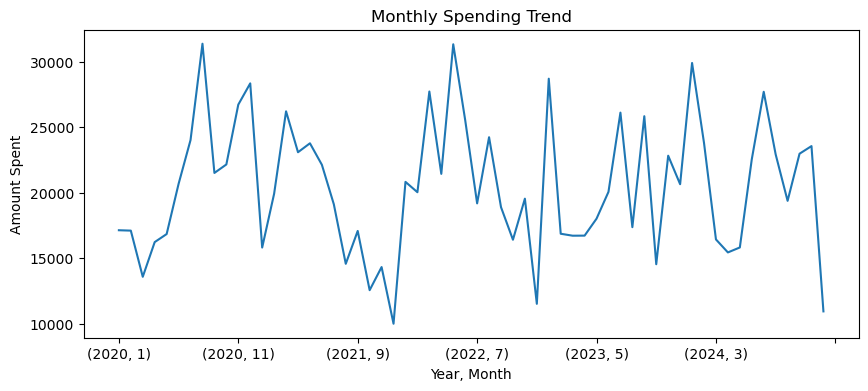

In [13]:
plt.figure(figsize=(10,4))
monthly_spending.plot(kind="line")
plt.title("Monthly Spending Trend")
plt.xlabel("Year, Month")
plt.ylabel("Amount Spent")
plt.show()

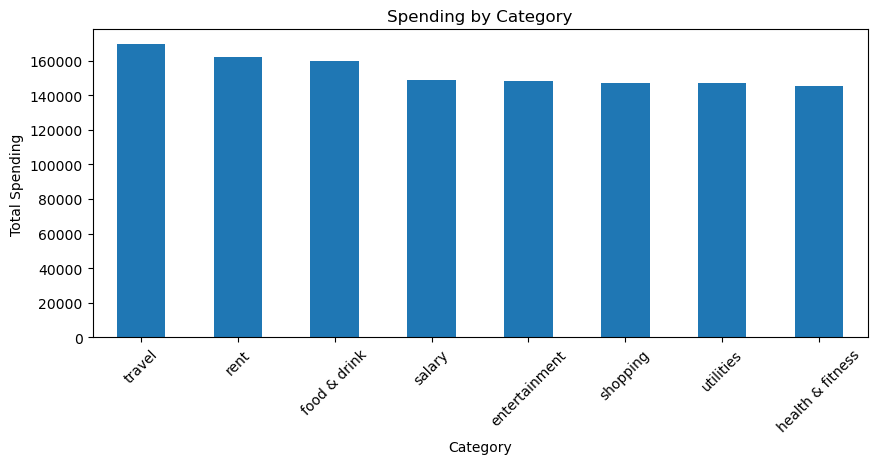

In [14]:
plt.figure(figsize=(10,4))
category_totals.plot(kind="bar")
plt.title("Spending by Category")
plt.xlabel("Category")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()

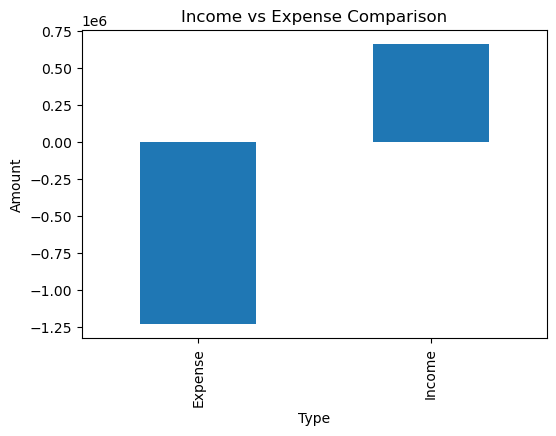

In [15]:
income_vs_expense = df.groupby("Type")["Amount"].sum()

plt.figure(figsize=(6,4))
income_vs_expense.plot(kind="bar")
plt.title("Income vs Expense Comparison")
plt.ylabel("Amount")
plt.show()